In [ ]:
import pandas as pd
import csv

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ddf=pd.read_csv('labeled_data.csv')

In [ ]:
ddf.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
ddf['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [ ]:
ddf['class']=ddf['class'].replace({0:1})

In [ ]:
ddf['class'].value_counts()

1    20620
2     4163
Name: class, dtype: int64

In [ ]:
update=ddf[ddf['class']==1]

In [ ]:
update.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [ ]:
update['class'].value_counts()

1    20620
Name: class, dtype: int64

In [ ]:
update.rename(columns={'class' : 'label'}, 
                    inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
update.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [ ]:
df=pd.read_csv('TwitterHate.csv')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
update_clean=update.iloc[:,5:]

In [ ]:
update_clean.head()

,label,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [ ]:
update_clean.label.value_counts()

1    20620
Name: label, dtype: int64

In [ ]:
df_final= pd.concat([df,update_clean], axis=0)

In [ ]:
df_final.head()

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is s...
1,2.0,0,@user @user thanks for #lyft credit i can't us...
2,3.0,0,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...
4,5.0,0,factsguide: society now #motivation


In [ ]:
df_final.label.value_counts()

0    29720
1    22862
Name: label, dtype: int64

In [ ]:
df.tweet[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [ ]:
from numpy.lib.arraysetops import unique
df_final['label'].unique()

array([0, 1])

In [ ]:
df_final.shape

(52582, 3)

In [ ]:
X=df_final['tweet'].values
y=df_final['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from transformers import AutoTokenizer
def tokenize(X):
    X = tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 150,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X
task='hate'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
X_train_tokens = tokenize(X_train)
X_test_tokens = tokenize(X_test)

In [ ]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel

In [ ]:
Length = 150
def get_model():
    dropout_rate = 0.2
    input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')
    embeddings = bert([input_ids, input_mask])[1] #pooler output
    print(embeddings)
    out = Dropout(0.2)(embeddings)
    #64 units dense layer
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)
    y = Dense(1,activation = 'sigmoid')(out)
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
   #define optimizer
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
    #complile the model
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [ ]:
bert = TFBertModel.from_pretrained(MODEL)

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-hate were not used when initializing TFBertModel: ['roberta', 'classifier']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-hate and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model'")


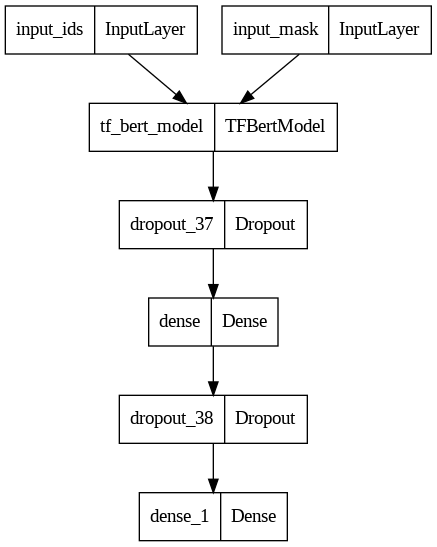

In [ ]:
model = get_model()
tf.keras.utils.plot_model(model)

In [ ]:
# weight_for_0 = (1 / hate)*(total)/3.0 
# weight_for_1 = (1 / ofensive)*(total)/3.0
# weight_for_2 = (1 / neither)*(total)/3.0
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbackEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
 # class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
from keras.callbacks import EarlyStopping, ModelCheckpoint
history = model.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                     y = y_train, 
                    epochs=3, 
                    validation_split = 0.2,
                    batch_size = 64, 
                    callbacks=[model_checkpoint_callback,callbackEarlyStopping])

Epoch 1/3
526/526 [==============================] - 1116s 2s/step - loss: 0.1843 - accuracy: 0.9350 - val_loss: 0.1401 - val_accuracy: 0.9565
Epoch 2/3
526/526 [==============================] - 1092s 2s/step - loss: 0.1348 - accuracy: 0.9567 - val_loss: 0.1356 - val_accuracy: 0.9577
Epoch 3/3
526/526 [==============================] - 1090s 2s/step - loss: 0.1240 - accuracy: 0.9593 - val_loss: 0.1236 - val_accuracy: 0.9593


In [ ]:
X_test_tokens['input_ids'],X_test_tokens['attention_mask']

(<tf.Tensor: shape=(10517, 150), dtype=int32, numpy=
 array([[    0, 42910,  1437, ...,     1,     1,     1],
        [    0,  1039,   495, ...,     1,     1,     1],
        [    0,   787, 12105, ...,     1,     1,     1],
        ...,
        [    0, 13963,   787, ...,     1,     1,     1],
        [    0,   100,   218, ...,     1,     1,     1],
        [    0,  4950,  4903, ...,     1,     1,     1]], dtype=int32)>,
 <tf.Tensor: shape=(10517, 150), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

yhat = np.where(model.predict({ 'input_ids' : X_test_tokens['input_ids'] , 'input_mask' : X_test_tokens['attention_mask']}) >=0.5,1,0)
print(classification_report(y_test,yhat))

329/329 [==============================] - 111s 328ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5961
           1       0.99      0.93      0.96      4556

    accuracy                           0.96     10517
   macro avg       0.97      0.96      0.96     10517
weighted avg       0.96      0.96      0.96     10517

